# Validation of Value-at-Risk (VVaR): sample usage

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Generate sample of observations (PnL and VaR)

In [2]:
np.random.seed(123)
n   = 1000 # Length of the observation's time window
p   = 0.05 # Value-at-Risk level
y   = pd.DataFrame(np.random.rand(n)) # Draw random sample of PnL
y_p = pd.DataFrame(np.repeat(p, n)) # Assume that VaR is properly estimated

## Plot the generated scenario

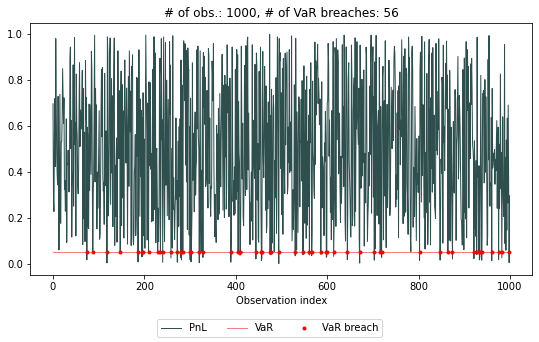

In [3]:
fig   = plt.figure(figsize=(9, 5))
index = np.arange(n)
ax    = plt.subplot(111)

ax.plot(index, y, label='PnL', color='darkslategray', linewidth=1)
ax.plot(index, y_p, label='VaR', color='lightcoral', linewidth=1)
ax.plot(y_p[y < y_p], label='VaR breach', color='red', linewidth=0, marker='.')
ax.set_title('# of obs.: {}, # of VaR breaches: {}'.format(n, sum((y < y_p).values)[0]))
ax.set_xlabel('Observation index')

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=3)
plt.subplots_adjust(bottom=0.18)

plt.show()

### Kupiec *Proportion of Failures* test
Reference: *Kupiec, P., 1995. Techniques for verifying the accuracy of risk measurement models. The J. of Derivatives, 3(2).*

In [4]:
from vvar import kupiec_pof
results = kupiec_pof(y=y, y_p=y_p, p = p)
print('Likelihood ratio: ' + str(results['lr']))
print('P-value         : ' + str(results['p-value']))

Likelihood ratio: 0.7307875225102975
P-value         : 0.39262804085411707


### *Binomial* test
Reference: *Philippe, J., 2001. Value at risk: the new benchmark for managing financial risk. NY: McGraw-Hill Professional.*

In [5]:
from vvar import binomial_pof
results = binomial_pof(y=y, y_p=y_p, p = p)
print('Likelihood ratio: ' + str(results['lr']))
print('P-value         : ' + str(results['p-value']))

Likelihood ratio: 0.870571500132014
P-value         : 0.3839881633980564


### Christoffersen *Independence* test
Reference: *Christoffersen, P. 1998. Evaluating interval forecasts. International Economic Review 39:841–62.*

In [6]:
from vvar import christoffersen_icov
results = christoffersen_icov(y=y, y_p=y_p, p = p)
print('Likelihood ratio: ' + str(results['lr']))
print('P-value         : ' + str(results['p-value']))

Likelihood ratio: 0.24606902861307844
P-value         : 0.6198566982299265


### Christoffersen *Conditional Coverage* test
Reference: *Christoffersen, P. 1998. Evaluating interval forecasts. International Economic Review 39:841–62.*

In [7]:
from vvar import christoffersen_ccov
results = christoffersen_ccov(y=y, y_p=y_p, p = p)
print('Likelihood ratio: ' + str(results['lr']))
print('P-value         : ' + str(results['p-value']))

Likelihood ratio: 1.7331060730032277
P-value         : 0.4203981517060994


### Kupiec *Time Until First Failure* test
Reference: *Kupiec, P., 1995. Techniques for verifying the accuracy of risk measurement models. The J. of Derivatives, 3(2).*

In [8]:
from vvar import kupiec_tuff
results = kupiec_tuff(y=y, y_p=y_p, p = p)
print('Likelihood ratio: ' + str(results['lr']))
print('P-value         : ' + str(results['p-value']))

Likelihood ratio: 2.9612888802360295
P-value         : 0.08527993689868485


### Haas *Time Between Failures* test
Reference: *Haas, M., 2001. New methods in backtesting. Financial Engineering Research Center, Bonn.*

In [9]:
from vvar import haas_tbf
results = haas_tbf(y=y, y_p=y_p, p = p)
print('Likelihood ratio: ' + str(results['lr']))
print('P-value         : ' + str(results['p-value']))

Likelihood ratio: 70.37360801931094
P-value         : 0.10981798695054201


### Christoffersen & Pelletier *Continuous Weibull* test
Reference: *Christoffersen, P. and Pelletier, D., 2004. Backtesting value-at-risk: A duration-based approach.*

In [10]:
from vvar import christoffersen_cweibull
results = christoffersen_cweibull(y=y, y_p=y_p, p = p)
print('Likelihood ratio: ' + str(results['lr']))
print('P-value         : ' + str(results['p-value']))

Likelihood ratio: 0.2510550882311122
P-value         : 0.6163331353347838


### Haas *Discrete Weibull* test
Reference: *Haas, M., 2005. Improved duration-based backtesting of value-at-risk. The Journal of Risk, 8(2), p.17.*

In [11]:
from vvar import haas_dweibull
results = haas_dweibull(y=y, y_p=y_p, p = p)
print('Likelihood ratio: ' + str(results['lr']))
print('P-value         : ' + str(results['p-value']))

Likelihood ratio: 0.15761687140767255
P-value         : 0.8753256635935078


### Engle & Manganelli *Dynamical Quantile* test
Reference: *Engle, R.F. and Manganelli, S., 2004. CAViaR: Conditional autoregressive value at risk by regression quantiles.*

In [12]:
from vvar import engle_dq
results = engle_dq(y=y, y_p=y_p, p = p)
print('Likelihood ratio: ' + str(results['lr']))
print('P-value         : ' + str(results['p-value']))

Likelihood ratio: 4.007958050878937
P-value         : 0.6755994125329239


### Berkowitz *Box-Ljung statistic* test
Reference: *Berkowitz, J., Christoffersen, P. and Pelletier, D., 2011. Evaluating value-at-risk models with desk-level data.*

In [13]:
from vvar import berkowitz_bl
results = berkowitz_bl(y=y, y_p=y_p, p = p)
print('Likelihood ratio: ' + str(results['lr']))
print('P-value         : ' + str(results['p-value']))

Likelihood ratio: 1.4424999032705403
P-value         : 0.9196084014523942


### Kramer and Wied *Gini coefficient* test
Reference: *Krämer, W. and Wied, D., 2015. A simple and focused backtest of value at risk. Economics Letters, 137, pp.29-31.*

In [14]:
from vvar import kramer_gini
results = kramer_gini(y=y, y_p=y_p, p = p)
print('Likelihood ratio: ' + str(results['lr']))
print('P-value         : ' + str(results['p-value']))

Likelihood ratio: -0.01795780222048364
P-value         : 0.9857363466502101
